### Student Information
Name: 陳冠達

Student ID: 110137504

GitHub ID: AdaChen445

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here

# first part

In [2]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

### ** >>> Exercise 1 (5 min): **  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [3]:
# Answer here
for t in twenty_train.target[:3]:
    print("\n".join(twenty_train.data[t].split("\n")))

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv domain, i.e  the mesh is a 
	mapping of a 3d Bezier patch into 2d. The area in this domain
	which is inside a trimming loop had to be rendered. The trimming
	loop is a set of 2d Bezier curve segments.
	For the sake of notation: the mesh is made up of cells.

	My problem is this :
	The trimming area has to be split up into individual smaller
	cells bounded by the trimming curve segments. If a cell
	is wholly inside the area...then it is output as a whole ,
	else it is trivially rejected. 

	Does any body know how thiss can be done, or is there any algo. 
	somewhere for doing this.

	Any help would be appreciated.

	Thanks, 
	Ani.
-- 
To get irritated is human, to stay cool, divi

In [4]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [5]:
# Answer here
X.loc[100:, 'category':'category_name']

category           category_name
100          0             alt.atheism
101          3  soc.religion.christian
102          0             alt.atheism
103          2                 sci.med
104          3  soc.religion.christian
...        ...                     ...
2252         2                 sci.med
2253         2                 sci.med
2254         2                 sci.med
2255         2                 sci.med
2256         2                 sci.med

[2157 rows x 2 columns]

### ** >>> Exercise 3 (5 min): **  
Try to fecth records belonging to the ```comp.graphics``` category, and query every 10th record. Only show the first 5 records.

In [6]:
# Answer here
X.loc[lambda f: f.category_name =='comp.graphics'].iloc[::10, :][0:5]

text  category  \
0    From: sd345@city.ac.uk (Michael Collier) Subje...         1   
43   From: zyeh@caspian.usc.edu (zhenghao yeh) Subj...         1   
76   From: sts@mfltd.co.uk (Steve Sherwood (x5543))...         1   
107  From: samson@prlhp1.prl.philips.co.uk (Mark Sa...         1   
172  From: thinman@netcom.com (Technically Sweet) S...         1   

     category_name  
0    comp.graphics  
43   comp.graphics  
76   comp.graphics  
107  comp.graphics  
172  comp.graphics

### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [7]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [8]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [9]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

#### Answer here
.isnull funtion can only detect true empty data, such as np.nan in A, None in E, and the totally missing in B
As for 'NaN' 'None' '' are idnetify as data that contain these string information

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

#### Answer here
the new X dataframe has randomly choose 1000 element from the original X dataframe 
the order of the data were been disturb as well

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
X_sample = X.sample(n=1000) #random state


### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

<AxesSubplot:title={'center':'Category distribution'}>

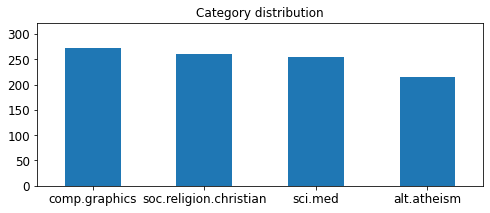

In [11]:
# Answer here
# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, max(X_sample.category_name.value_counts())+50], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

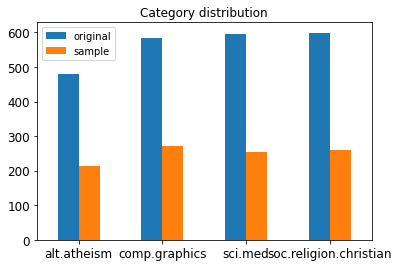

In [12]:
# Answer here

df = pd.concat([X.category_name.value_counts(), X_sample.category_name.value_counts()], axis=1, sort=True)
df.columns = ["original", "sample"]

df.plot(kind = 'bar',
        title="Category distribution",
        rot = 0, fontsize = 12)
plt.show()

In [13]:
import nltk
nltk.download('punkt')
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
analyze = count_vect.build_analyzer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jerry\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [14]:
# Answer here
analyze(X.loc[0]["text"])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [15]:
# Answer here
a=np.where(X_counts[4, 0:100].toarray() == 1)
print(count_vect.get_feature_names()[a[1][1]])

01


c:\users\jerry\anaconda3\envs\dm\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

c:\users\jerry\anaconda3\envs\dm\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


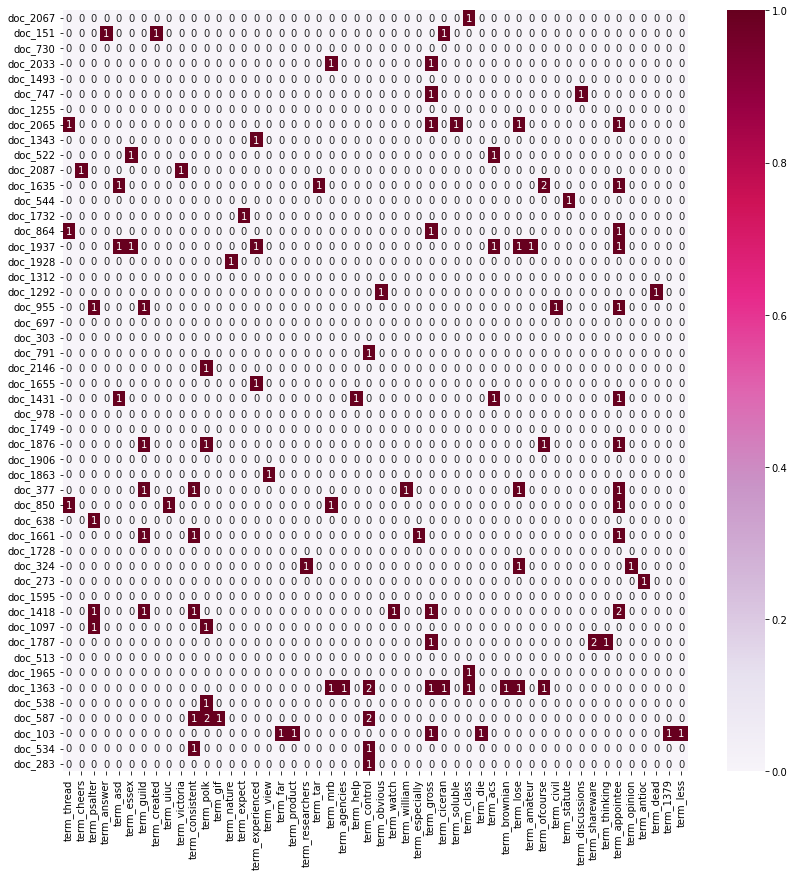

In [17]:
# Answer here
# sample only 50 record to reduce data number
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from random import sample

X_sample_50 = X.sample(50)
count_vect = CountVectorizer()
X_sample_50_count = count_vect.fit_transform(X_sample_50.text)[:50,:50]
count_name = sample(count_vect.get_feature_names(), 50 )


plot_x = ["term_"+str(i) for i in count_name]
plot_y = ["doc_"+ str(i) for i in list(X_sample_50.index)]
plot_z = X_sample_50_count.toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
# df_todraw_resample = df_todraw.sample(300) #must sample before df or it'll take forever
plt.figure(figsize=(14, 14))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [18]:
from sklearn.decomposition import PCA

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [19]:
# Answer here
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced.shape
# the data were project to 3d space, wow

(2257, 3)

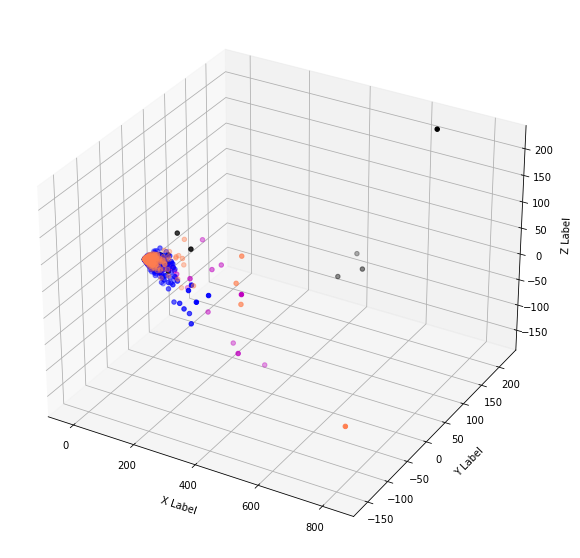

In [20]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = plt.axes(projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')


plt.show()

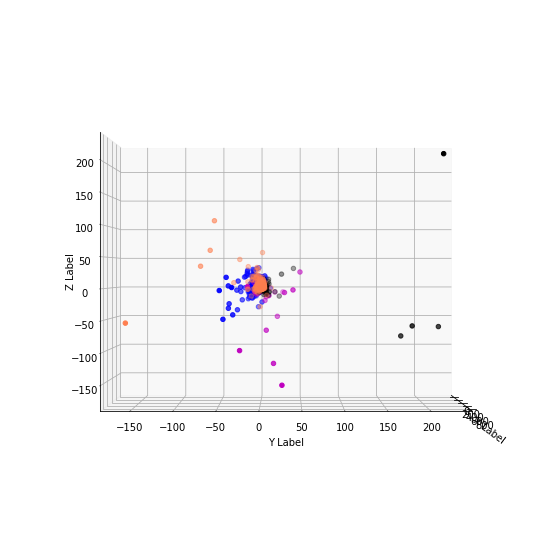

In [21]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = plt.axes(projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
elev = 0.0
azim = 0.0
ax.view_init(elev, azim)
plt.show()

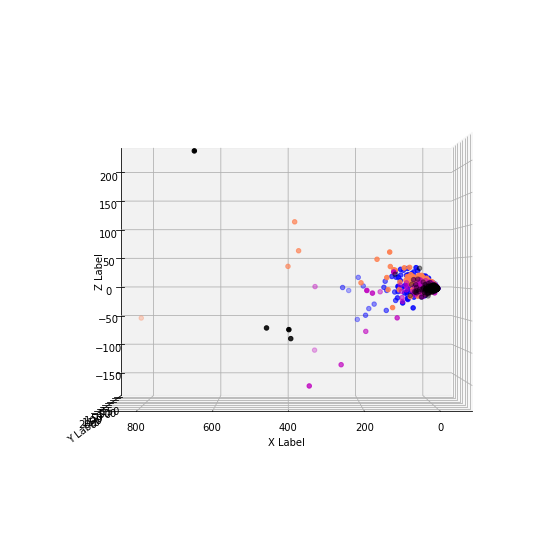

In [22]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = plt.axes(projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
elev = 0.0
azim = 90.0
ax.view_init(elev, azim)
plt.show()

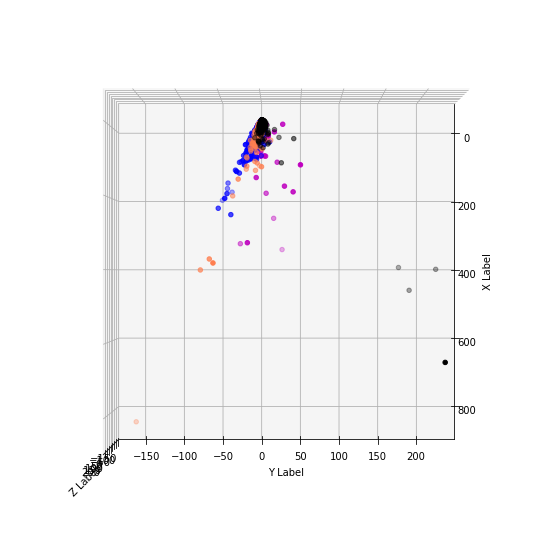

In [23]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = plt.axes(projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
elev = 90.0
azim = 0.0
ax.view_init(elev, azim)
plt.show()

In [24]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [25]:
# Answer here
import plotly.express as px
fig = px.bar(x=count_vect.get_feature_names()[:300],
             y=term_frequencies[:300])
fig.show()

c:\users\jerry\anaconda3\envs\dm\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [32]:
# Answer here
# here i just simply use resample function to reduce data number
dict_fig = {"feature":count_vect.get_feature_names(),"frequencies":term_frequencies}
df_fig = pd.DataFrame.from_dict(dict_fig, orient='index')
df_resample = df_fig.sample(n=300, replace=True)
re_fea = df_resample['feature']
re_fre = df_resample['frequencies']

fig = px.bar(x=re_fea, y=re_fre)
fig.show()


KeyError: 'feature'

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [34]:
# Answer here
dict_fig = {"feature":count_vect.get_feature_names_out(),"frequencies":term_frequencies}
# dict_fig = sorted(dict_fig_org.items(), key=lambda x:x[1], reverse=True) #not sure why didnt work
df_fig = pd.DataFrame(dict_fig)
df_fig = df_fig.sort_values(by="frequencies")[::-1]
part_fea = df_fig["feature"][:300]
part_fre = df_fig["frequencies"][:300]

fig = px.bar(x=part_fea, y=part_fre)
fig.show()

ValueError: All arrays must be of the same length

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [35]:
# Answer here
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:10]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   
9                 sci.med  [From, :, libman, @, hsc.usc.edu, (, Marlena, ...   

   bin_category  
0  [0, 1, 0, 0]  
1  [0, 1, 0, 0]  
2  [0, 0, 0, 1]  
3  [0, 0, 0, 1]  
4  [0, 0, 0, 1]  
5  [0, 0, 0, 1]  
6  [0, 0, 0, 1]  
7  [0, 0, 1, 0]  
8  [0, 0, 1, 0]  
9  [0, 0, 1, 0]

# second part

## 1.Data Source

## 2.Data Preparation

In [36]:
#load data as csv
amazon_data = pd.read_csv("sentiment labelled sentences/amazon_cells_labelled.txt", sep="\t", names=["text", "label"])
imdb_data = pd.read_csv("sentiment labelled sentences/imdb_labelled.txt", sep="\t", names=["text", "label"])
yelp_data = pd.read_csv("sentiment labelled sentences/yelp_labelled.txt", sep="\t", names=["text", "label"])

In [37]:
#add source columm
amazon_data['source'] = "amazon"
imdb_data['source'] = "imdb"
yelp_data['source'] = "yelp"

In [38]:
#concade all data
data = amazon_data.append((imdb_data, yelp_data), ignore_index = True)

#check if have multiple index
data.text[234]

'Really pleased with this product so far.'


## 3. Data Transformation

In [39]:
data #thank to read_csv, dealing with df is such a nightmare

text  label  source
0     So there is no way for me to plug it in here i...      0  amazon
1                           Good case, Excellent value.      1  amazon
2                                Great for the jawbone.      1  amazon
3     Tied to charger for conversations lasting more...      0  amazon
4                                     The mic is great.      1  amazon
...                                                 ...    ...     ...
2743  I think food should have flavor and texture an...      0    yelp
2744                           Appetite instantly gone.      0    yelp
2745  Overall I was not impressed and would not go b...      0    yelp
2746  The whole experience was underwhelming, and I ...      0    yelp
2747  Then, as if I hadn't wasted enough of my life ...      0    yelp

[2748 rows x 3 columns]

## 4. Data Mining using Pandas

### 4.1 missing value

In [40]:
#check missing data
data.isnull().apply(lambda x: dmh.check_missing_values(x))

text                               label  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                               source  
0  The amoung of missing records is:   
1                                   0

### 4.2 duplicated data

In [41]:
#check duplicated data
sum(data.duplicated('text'))

17

In [42]:
#check whats the duplicated text
data.text[data.duplicated('text')]

285                                         Great phone!.
407                                          Works great.
524                                         Works great!.
543                               Don't buy this product.
744     If you like a loud buzzing to override all you...
748                                         Does not fit.
778                                 This is a great deal.
792                                          Great Phone.
892                      Excellent product for the price.
896                                          Great phone.
1165                     Definitely worth checking out.  
1387                                   Not recommended.  
1590                                              10/10  
2562                                   I love this place.
2564                               The food was terrible.
2591                                     I won't be back.
2594                    I would not recommend this place.
Name: text, dt

In [43]:
#drop these data and check again
data.drop_duplicates(keep=False, inplace=True)
sum(data.duplicated('text'))

0

## 5. Data Preprocessing

### 5.1 data distribution

In [44]:
#sample a sub set of data
data_sample = data.sample(n=1000)
len(data_sample)

1000

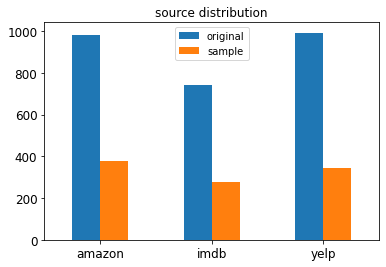

In [45]:
#plot the number of each source of original and sample
df = pd.concat([data.source.value_counts(), data_sample.source.value_counts()], axis=1, sort=True)
df.columns = ["original", "sample"]

df.plot(kind = 'bar',
        title="source distribution",
        rot = 0, fontsize = 12)
plt.show()

### 5.2 feature creation

In [46]:
#seprate each word
data['unigrams'] = data['text'].apply(lambda x: dmh.tokenize_text(x))
data

text  label  source  \
0     So there is no way for me to plug it in here i...      0  amazon   
1                           Good case, Excellent value.      1  amazon   
2                                Great for the jawbone.      1  amazon   
3     Tied to charger for conversations lasting more...      0  amazon   
4                                     The mic is great.      1  amazon   
...                                                 ...    ...     ...   
2743  I think food should have flavor and texture an...      0    yelp   
2744                           Appetite instantly gone.      0    yelp   
2745  Overall I was not impressed and would not go b...      0    yelp   
2746  The whole experience was underwhelming, and I ...      0    yelp   
2747  Then, as if I hadn't wasted enough of my life ...      0    yelp   

                                               unigrams  
0     [So, there, is, no, way, for, me, to, plug, it...  
1                  [Good, case, ,, Excellent, value, .]  
2                         [Great, for, the, jawbone, .]  
3     [Tied, to, charger, for, conversations, lastin...  
4                              [The, mic, is, great, .]  
...                                                 ...  
2743  [I, think, food, should, have, flavor, and, te...  
2744                     [Appetite, instantly, gone, .]  
2745  [Overall, I, was, not, impressed, and, would, ...  
2746  [The, whole, experience, was, underwhelming, ,...  
2747  [Then, ,, as, if, I, had, n't, wasted, enough,...  

[2714 rows x 4 columns]

### 5.3 feature subset selection

In [49]:
#analyze text frequency
count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.text)
data_counts.shape

(2714, 5153)

In [50]:
#obtain the feature name
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

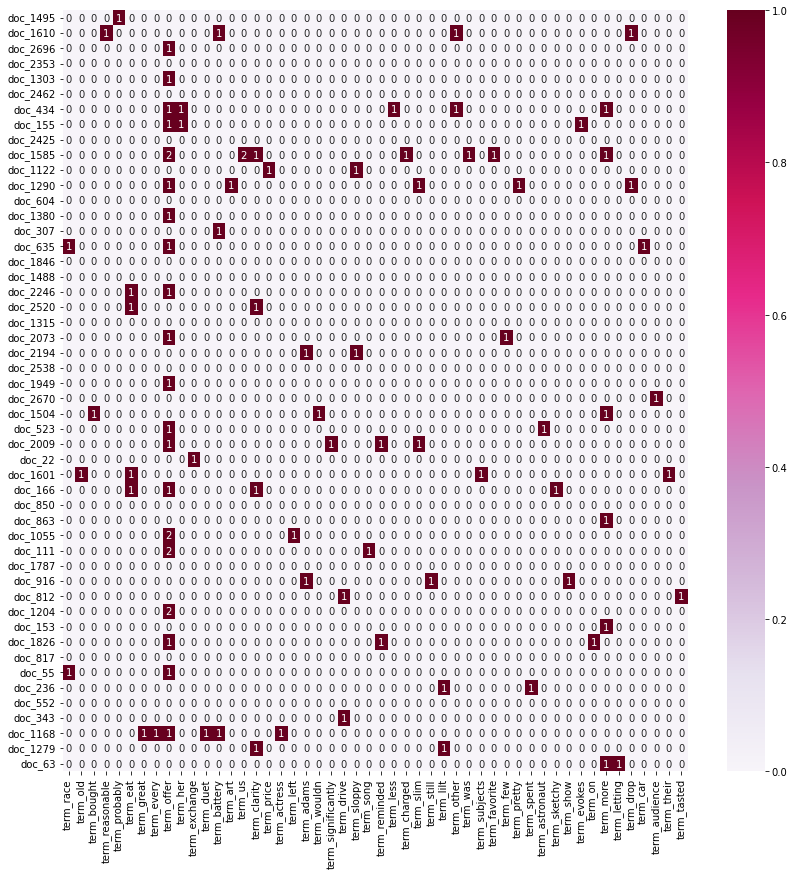

In [51]:
#sample 50 data to plot heatmap

data_sample_50 = data.sample(50)
data_sample_50_count = count_vect.fit_transform(data_sample_50.text)[:50,:50]
data_count_name = sample(count_vect.get_feature_names(), 50 )


plot_x = ["term_"+str(i) for i in data_count_name]
plot_y = ["doc_"+ str(i) for i in list(data_sample_50.index)]
plot_z = data_sample_50_count.toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
# df_todraw_resample = df_todraw.sample(300) #must sample before df or it'll take forever
plt.figure(figsize=(14, 14))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### 5.4 dimensionality reduction

In [52]:
#use PCA to turn data into 2d
data_reduced = PCA(n_components = 2).fit_transform(data_counts.toarray())
data_reduced.shape

(2714, 2)

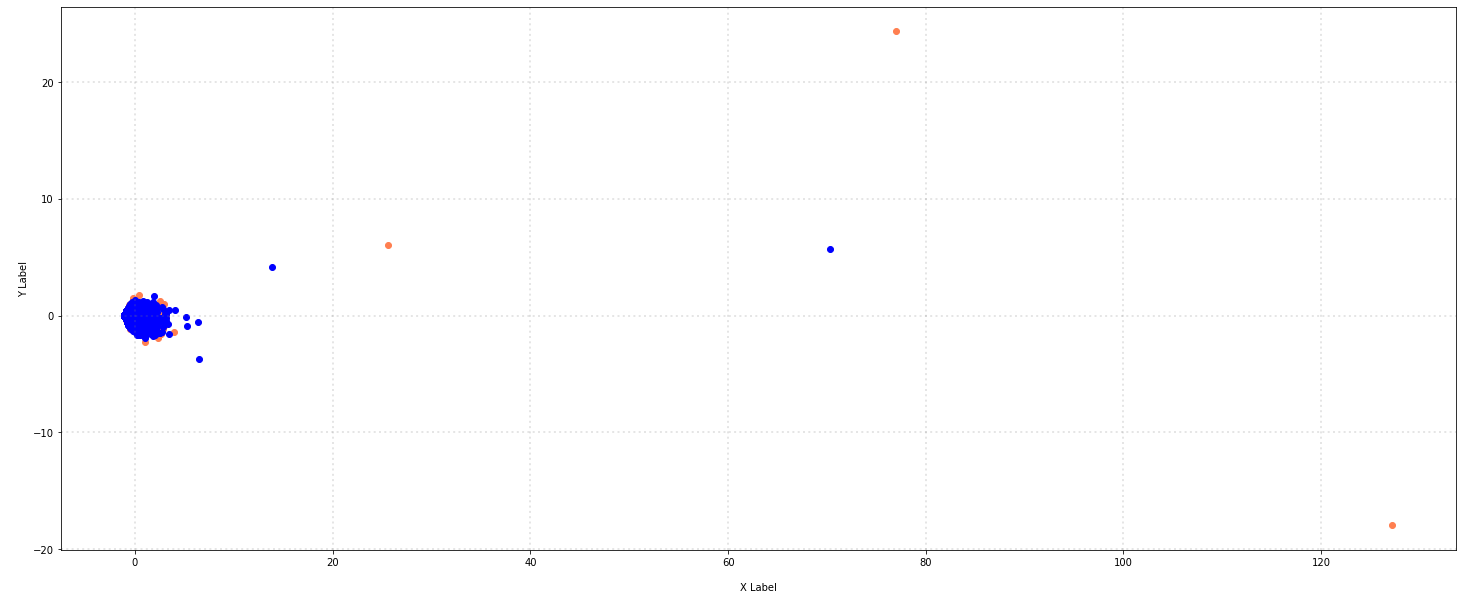

In [53]:
#2d plot
col = ['coral', 'blue', 'black', 'm']
categories = [0, 1]

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = data_reduced[data['label'] == category].T[0]
    ys = data_reduced[data['label'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

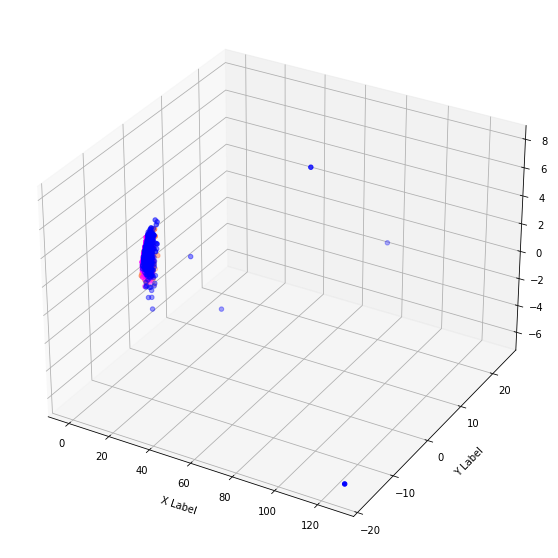

In [54]:
#3d plot
data_reduced_3d = PCA(n_components = 3).fit_transform(data_counts.toarray())

col = ['coral', 'blue', 'magenta']
categories = ['amazon', 'imdb', 'yelp']

# plot
fig = plt.figure(figsize = (25,10))
ax = plt.axes(projection='3d')

for c, category in zip(col, categories):
    xs = data_reduced_3d[data['source'] == category].T[0]
    ys = data_reduced_3d[data['source'] == category].T[1]
    zs = data_reduced_3d[data['source'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### 5.5 atribution transformation / aggregation

In [55]:
term_frequencies = []
for j in range(0,data_counts.shape[1]):
    term_frequencies.append(sum(data_counts[:,j].toarray()))
term_frequencies = np.asarray(data_counts.sum(axis=0))[0]
len(term_frequencies)

5153

c:\users\jerry\anaconda3\envs\dm\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

c:\users\jerry\anaconda3\envs\dm\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



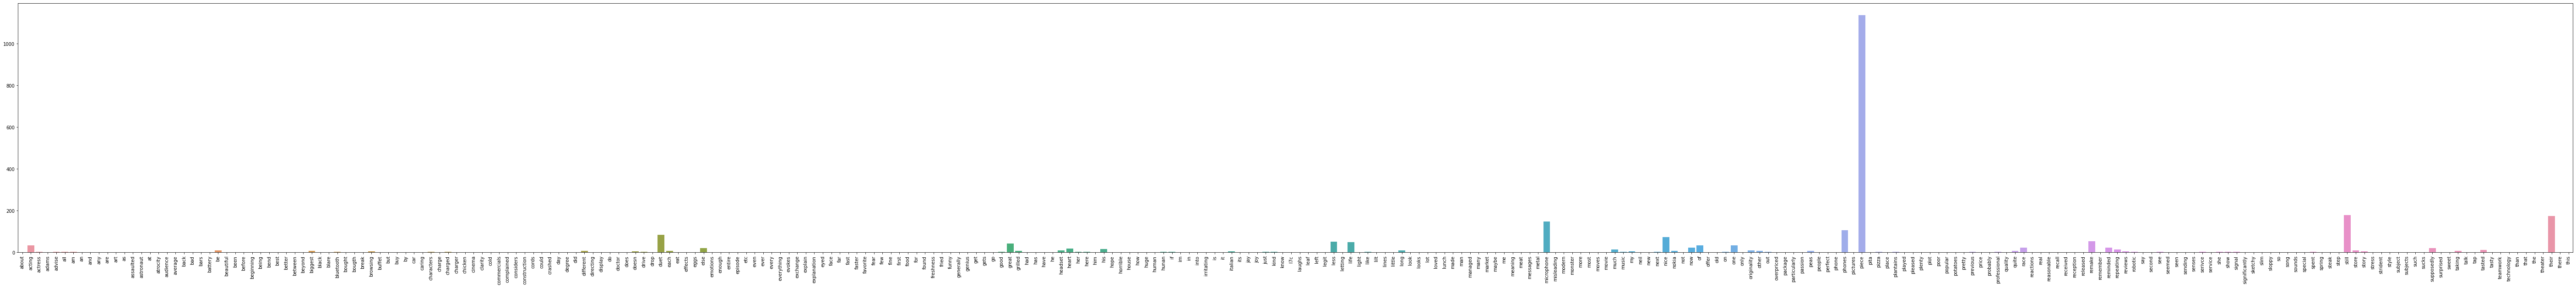

In [56]:
#plot term_frequencies
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [57]:
#plot long-tail term_frequencies
#cant figure out why it doesnt work
dict_fig = {"feature":count_vect.get_feature_names(),"frequencies":term_frequencies}
df_fig = pd.DataFrame(dict_fig)
df_fig = df_fig.sort_values(by="frequencies")[::-1]
part_fea = df_fig["feature"]
part_fre = df_fig["frequencies"]

fig = px.bar(x=part_fea, y=part_fre)
fig.show()

ValueError: All arrays must be of the same length

### 5.6 Discretization and Binarization

In [62]:
from sklearn import preprocessing
mlb = preprocessing.LabelBinarizer()
mlb.fit(data.label)
print(mlb.classes_)
data['bin_category'] = mlb.transform(data['label']).tolist()
data[0:9][['text', 'label', 'source']]

[0 1]


text  label  source
0  So there is no way for me to plug it in here i...      0  amazon
1                        Good case, Excellent value.      1  amazon
2                             Great for the jawbone.      1  amazon
3  Tied to charger for conversations lasting more...      0  amazon
4                                  The mic is great.      1  amazon
5  I have to jiggle the plug to get it to line up...      0  amazon
6  If you have several dozen or several hundred c...      0  amazon
7        If you are Razr owner...you must have this!      1  amazon
8                Needless to say, I wasted my money.      0  amazon

## 6. Data Exploration

In [64]:
document_to_transform_1 = []
random_record_1 = data.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = data.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = data.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Let's take a look at the count vectors:
[[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 

# third part

## 1. Generate meaningful new data visualizations

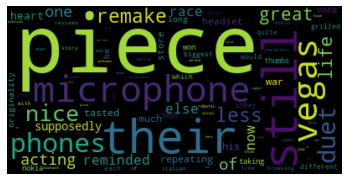

In [69]:
#here i use word cloud library to show how frequent the word appear
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
word_dict = {}

for i in range(len(count_vect.get_feature_names())):
    word_dict[count_vect.get_feature_names()[i]] = term_frequencies[i]
cloud = WordCloud().generate_from_frequencies(word_dict)

plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 2. Generate TF-IDF features from the tokens of each text

In [74]:
#using sklearn funtion
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data.text)

df_tfidp = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df_tfidp

00   10  100   11   12   13   15  15g  15pm   17  ...  yucky  yukon  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...    ...   
2709  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2710  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2711  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2712  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2713  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   

      yum  yummy  yun  z500a  zero  zillion  zombie  zombiez  
0     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
1     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
3     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
4     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
...   ...    ...  ...    ...   ...      ...     ...      ...  
2709  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2710  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2711  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2712  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2713  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  

[2714 rows x 5153 columns]

## 3. Implement a simple Naive Bayes classifier

In [86]:
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split

data['frequency'] = list(data_counts.toarray())
x = data['frequency']
y = data['label']

#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
y_label=le.fit_transform(y)
x_fre = list(x)

x_train, x_test, y_train, y_test = train_test_split(x_fre, y_label, test_size=0.3,random_state=109)
gnb = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6257668711656442


# forth part

1. we can observe that both of the dataset contain large amount of adposition such as 'the' 'at' 'in', in this case we can use stopwords setting to filter the non-important content.

2. although in Exercise.11 i implemented the sample technique, it's not a perfect solution to illustrate how data distributed since we just observe very small part of dataset.

3. in the lab1, we perform loading data by  default import function, however it's not the case for the new dataset, i've a hard time dealing with how to load data correctly, maybe more detailed tutorial can be add in next year's lab.